# Include All Required Libraries

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Defining the Functions for Kmeans and Gausian Mixture Model with PCA 

In [3]:
# defining the function for kmeans to find the appropriate number of clusters using silhoutte scores
def kmeans_clustering_find_clusters(scaled_features,max_labels=11):
  # A list holds the silhouette coefficients for each k
  cluster = 0
  sil = 0
  silhouette_coefficients = []
  for k in range(2, max_labels):
    kmeans = KMeans(n_clusters=k, init = "k-means++", n_init= 10, max_iter= 300, random_state= 42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    if sil < score :
      cluster = k
      sil = score
    silhouette_coefficients.append(score)
    Output = kmeans.predict(scaled_features)
    print("For Cluster ",k)
    print("Centroids are: ",kmeans.cluster_centers_)
    print("Number of iterations are: ",kmeans.n_iter_)
    print("Labels are: ",kmeans.labels_[:5])
    print("Centroid Shape is: ",kmeans.cluster_centers_.shape)
    print("Silhoutte Score for cluster ",k," is ",score,'\n')
  plt.style.use("fivethirtyeight")
  plt.plot(range(2, 11), silhouette_coefficients)
  plt.xticks(range(2, 11))
  plt.xlabel("Number of Clusters")
  plt.ylabel("Silhouette Coefficient")
  plt.show()
  print("Finally Based on silhoutte score the cluster ",cluster," is chosen having maximum score of ",sil)
  return cluster,sil
# defining the function to perform kmeans on appropriate cluster found earlier
def final_kmeans(scaled_features,plot_x,plot_y,cluster=2):
  print("Finally Running the kmeans with the clusters found out using silhoutte scores")
  str = ["Cluster with k=1","Cluster with k=2","Cluster with k=3","Cluster with k=4","Cluster with k=5","Cluster with k=6","Cluster with k=7","Cluster with k=8"]
  kmeans = KMeans(n_clusters=cluster, init = "k-means++", n_init= 10, max_iter= 300, random_state= 42)
  kmeans.fit(scaled_features)
  Output = kmeans.predict(scaled_features)
  print("Shape of Centroids is: ",kmeans.cluster_centers_.shape)
  x_min, x_max = scaled_features[:, plot_x].min() - 1, scaled_features[:, plot_x].max() + 1
  y_min, y_max = scaled_features[:, plot_y].min() - 1, scaled_features[:, plot_y].max() + 1
  plt.style.use("fivethirtyeight")
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
  plt.scatter(scaled_features[:,plot_x],scaled_features[:,plot_y],c=Output,label=str[cluster-1])
  plt.scatter(kmeans.cluster_centers_[:,plot_x],kmeans.cluster_centers_[:,plot_y],s=30,c='Red',label='Centroids')
  plt.legend()
  plt.show()
  return kmeans
# defining the function for kmeans using reduced data
def kmeans_pca(scaled_features,cluster=2):
  reduced_data = PCA(n_components=2).fit_transform(scaled_features)
  kmeans = KMeans(init="k-means++", n_clusters=cluster, n_init=4)
  kmeans.fit(reduced_data)
  target = kmeans.predict(reduced_data)
  # Step size of the mesh. Decrease to increase the quality of the VQ.
  h = 0.2  
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  # Plot the decision boundary. For that, we will assign a color to each
  x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
  y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Obtain labels for each point in mesh. Use last trained model.
  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.clf()
  plt.contourf(xx, yy, Z, cmap = 'viridis',c=target)
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1],c=target)
  # Plot the centroids as a white X
  centroids = kmeans.cluster_centers_
  plt.scatter(
      centroids[:, 0],
      centroids[:, 1],
      marker="+",
      s=169,
      linewidths=3,
      color="w",
      zorder=10,
  )
  plt.title("K-means clustering on the dataset (PCA-reduced data)\n""Centroids are marked with white +")
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.show()
# defining the function for GMM using kmeans
def gausianmixturemodel(scaled_features,plot_x,plot_y,cluster=2):
  print("\n\nDiagonal matrix used")
  kmeans = KMeans(n_clusters=cluster, init = "k-means++", n_init= 10, max_iter= 300, random_state= 42)
  kmeans.fit(scaled_features)
  Output = kmeans.predict(scaled_features)
  str = ["Cluster with k=1","Cluster with k=2","Cluster with k=3","Cluster with k=4","Cluster with k=5","Cluster with k=6","Cluster with k=7","Cluster with k=8"]
  gm_diag = GaussianMixture(n_components=cluster, random_state=0,covariance_type='diag',init_params='kmeans',means_init=kmeans.cluster_centers_)
  gm_full = GaussianMixture(n_components=cluster, random_state=0,covariance_type='full',init_params='kmeans',means_init=kmeans.cluster_centers_)
  gm_identity = GaussianMixture(n_components=cluster, random_state=0,covariance_type='tied',init_params='kmeans',means_init=kmeans.cluster_centers_)
  gm_diag.fit(scaled_features)
  target = gm_diag.predict(scaled_features)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.scatter(scaled_features[:,plot_x],scaled_features[:,plot_y],c=target,label=str[cluster-1])
  plt.scatter(gm_diag.means_[:,plot_x],gm_diag.means_[:,plot_y],c="Red",label="Means")
  plt.legend()
  plt.show()
  print(kmeans.cluster_centers_)
  print(gm_diag.means_)
  # for full diagonal
  print("\n\nFull matrix used")
  gm_full.fit(scaled_features)
  target = gm_full.predict(scaled_features)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.scatter(scaled_features[:,plot_x],scaled_features[:,plot_y],c=target,label=str[cluster-1])
  plt.scatter(gm_full.means_[:,plot_x],gm_full.means_[:,plot_y],c="Red",label="Means")
  plt.legend()
  plt.show()
  print(kmeans.cluster_centers_)
  print(gm_full.means_)
  print("\n\nIdentity matrix used")
  gm_identity.fit(scaled_features)
  target = gm_identity.predict(scaled_features)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.scatter(scaled_features[:,plot_x],scaled_features[:,plot_y],c=target,label=str[cluster-1])
  plt.scatter(gm_identity.means_[:,plot_x],gm_identity.means_[:,plot_y],c="Red",label="Means")
  plt.legend()
  plt.show()
  print(kmeans.cluster_centers_)
  print(gm_identity.means_)
def gmm_pca(scaled_features,cluster=2):
  reduced_data = PCA(n_components=2).fit_transform(scaled_features)
  kmeans = KMeans(init="k-means++", n_clusters=cluster, n_init=4)
  kmeans.fit(reduced_data)
  target = kmeans.predict(reduced_data)
  gm_diag = GaussianMixture(n_components=cluster, random_state=0,covariance_type='diag',init_params='kmeans',means_init=kmeans.cluster_centers_)
  gm_diag.fit(reduced_data)
  # Step size of the mesh. Decrease to increase the quality of the VQ.
  h = 0.2  
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  # Plot the decision boundary. For that, we will assign a color to each
  x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
  y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Obtain labels for each point in mesh. Use last trained model.
  Z = gm_diag.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.clf()
  plt.contourf(xx, yy, Z, cmap = 'viridis',c=target)
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1],c=target)
  # Plot the centroids as a white X
  centroids = gm_diag.means_init
  plt.scatter(
      centroids[:, 0],
      centroids[:, 1],
      marker="+",
      s=169,
      linewidths=3,
      color="w",
      zorder=10,
  )
  plt.title("GMM on the dataset (PCA-reduced data)\n""Centroids are marked with white +")
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.show() 
  

# First Dataset
## -> Describing the data

In [8]:
#X, y_true = make_blobs(n_samples=500, centers=8,cluster_std=0.60, random_state=0)
df = pd.read_csv("Wine.csv")
print(df.info(),'\n')
print(df.describe,'\n')
print(df.head(),'\n')
print(df.shape,'\n')
print(df.isnull().sum(),'\n')
print(df.columns,'\n')
#plt.scatter(X[:, 0], X[:, 1], s=50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None 

<bound method NDFram

## -> Selecting the target and Removing it from examples 

In [12]:
c ='Customer_Segment'
print(df[c].unique())
#le = LabelEncoder()
#df[c] = le.fit_transform(df[c])
y_true = df[c]
X = df.iloc[:,:13]
print(df.info())
print(X.columns)
print(y_true)

[1 2 3]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
Index(['Alcoho

In [13]:
print(X[:5])
print(y_true[:5])

   Alcohol  Malic_Acid   Ash  ...   Hue  OD280  Proline
0    14.23        1.71  2.43  ...  1.04   3.92     1065
1    13.20        1.78  2.14  ...  1.05   3.40     1050
2    13.16        2.36  2.67  ...  1.03   3.17     1185
3    14.37        1.95  2.50  ...  0.86   3.45     1480
4    13.24        2.59  2.87  ...  1.04   2.93      735

[5 rows x 13 columns]
0    1
1    1
2    1
3    1
4    1
Name: Customer_Segment, dtype: int64


## -> Scaling the Data

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
print(scaled_features[:5])

[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


## -> Running the Functions Defined Above For Kmeans

For Cluster  2
Centroids are:  [[ 0.04197899 -0.38224053 -0.10922044 -0.29717226  0.08897972  0.5428402
   0.60204711 -0.48200615  0.41194796 -0.31261472  0.50738654  0.61509448
   0.26067933]
 [-0.07297886  0.66451047  0.18987553  0.51662255 -0.15468782 -0.94370681
  -1.04663574  0.83794915 -0.71615568  0.54346866 -0.88207198 -1.06931809
  -0.45318098]]
Number of iterations are:  6
Labels are:  [0 0 0 0 0]
Centroid Shape is:  (2, 13)
Silhoutte Score for cluster  2  is  0.26831340971052126 

For Cluster  3
Centroids are:  [[ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.2707641

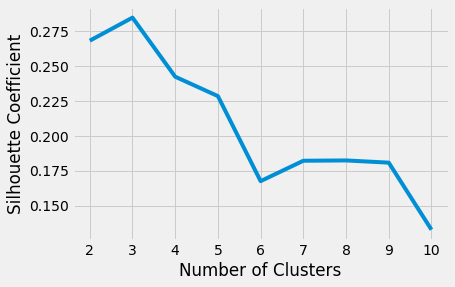

Finally Based on silhoutte score the cluster  3  is chosen having maximum score of  0.2848589191898987
3 0.2848589191898987
Finally Running the kmeans with the clusters found out using silhoutte scores
Shape of Centroids is:  (3, 13)


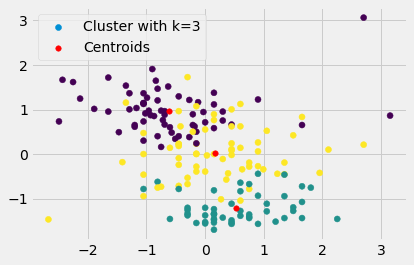

In [16]:
cluster,sil = kmeans_clustering_find_clusters(scaled_features,11)
print(cluster,sil)
km = final_kmeans(scaled_features,3,6,cluster)

## -> Kmeans With PCA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning: The following kwargs were not used by contour: 'c'


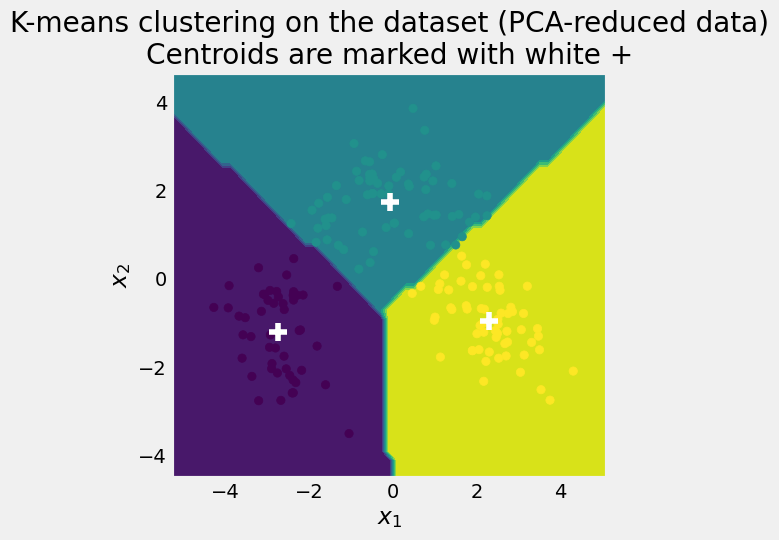

In [17]:
kmeans_pca(scaled_features,cluster)

## -> Gausian Mixture Model



Diagonal matrix used


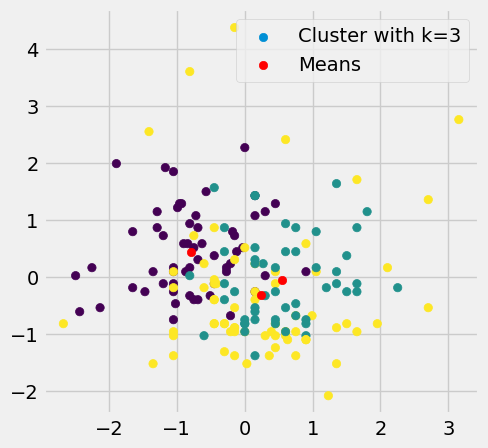

[[ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]]
[[ 0.95241954 -0.33411933  0.27004471 -0.79099196  0.44163737  0.8906181
   0.97368656 -0.60884898  0.54643753  0.2311523   0.47024486  0.77038994
   1.22082015]
 [ 0.15504821  0.84424631  0.19988035  0.54457954 -0.05064774 -0.99346179
  -1.21856027  0.7180595  -0.76162976  0.93524319 -1.14960115 -1.29791405
  -0.38100933]
 [-0.87865449 -0.34415506 -0.36232405  0.24088994 -0.31846784  0.00485536
   0.10145578 -0.03156289  0.11339569 -0.86490148  0.45634305  0.32258981
  -0.70537754]]


Full matrix used


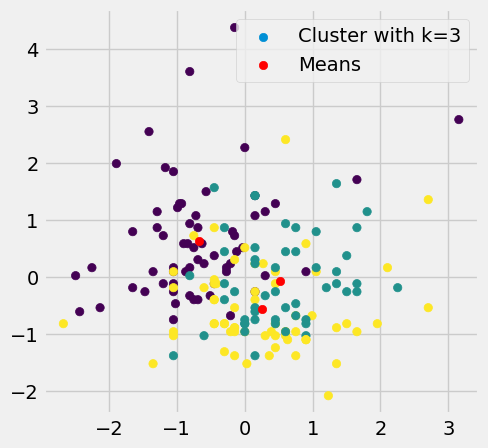

[[ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]]
[[ 0.81388958 -0.33262555  0.24380292 -0.6750915   0.63510284  0.82094008
   0.89622873 -0.5979901   0.61932153  0.13104449  0.5009758   0.74595868
   1.11233685]
 [ 0.16518103  0.87142811  0.18788644  0.52524876 -0.07458612 -0.9792853
  -1.21560547  0.7259935  -0.7794772   0.9426359  -1.16489918 -1.2928127
  -0.40657496]
 [-0.94261117 -0.36648604 -0.39317067  0.25165095 -0.57263915 -0.03336322
   0.08087369  0.01416567  0.00741468 -0.88515821  0.43381965  0.29230585
  -0.78201446]]


Identity matrix used

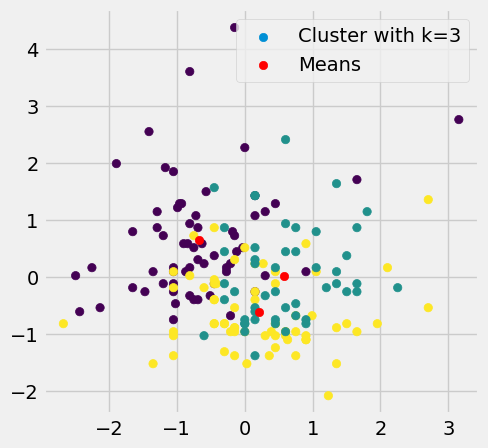

[[ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]]
[[ 0.82602795 -0.34379253  0.25311158 -0.67918774  0.64668351  0.82987409
   0.90082802 -0.59803584  0.62307512  0.1385985   0.50573192  0.74727106
   1.12995736]
 [ 0.15477323  0.87241974  0.27949143  0.57711214  0.01902433 -0.990502
  -1.24797474  0.63997952 -0.75159187  0.96687237 -1.18066333 -1.29408398
  -0.37287494]
 [-0.89156267 -0.32054384 -0.44451346  0.2130757  -0.62258179 -0.04969168
   0.07361699  0.09029941 -0.03146475 -0.84420869  0.39571522  0.25215578
  -0.788032  ]]


In [19]:
gausianmixturemodel(scaled_features,3,4,cluster)

## -> Gausian Mixture Model with PCA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:147: UserWarning: The following kwargs were not used by contour: 'c'


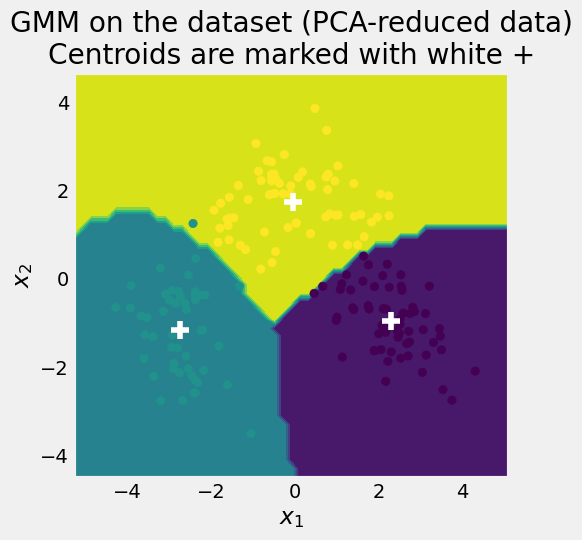

In [20]:
gmm_pca(scaled_features,cluster)

# Second Data Set used
## -> Descrbing Data

In [21]:
df = pd.read_csv("Live.csv")
print(df.info(),'\n')
print(df.describe,'\n')
print(df.head(),'\n')
print(df.shape,'\n')
print(df.isnull().sum(),'\n')
print(df.columns,'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

## -> Since Colums 1 to 4 have NULL values removing them and since status_id and status_pblished have non unique values removing them also.

In [22]:
df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)
df.drop(['status_id','status_published'],axis=1,inplace=True)

## -> Removing the Target feature

In [25]:
c ='status_type'
print(df[c].unique())
le = LabelEncoder()
df[c] = le.fit_transform(df[c])
y_true = df[c]
X = df.iloc[:,1:].values
print(df.info())
print(X)
print(y_true)

[3 1 0 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB
None
[[529 512 262 ...   1   1   0]
 [150   0   0 ...   0   0   0]
 [227 236  57 ...   1   0   0]
 ...
 [  2   0   0 ...   0   0   0]
 [351  12  22 ...   0   0   0]
 [ 17   0   0 ...   0   0   0]]
0       3
1       1
2       3
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050

## -> Scaling the examples

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
print(scaled_features[:5])

[[ 0.64610394  0.32335035  1.6868788   0.48272661  1.98326643  0.1961959
   0.07671305  0.47357035 -0.15574803]
 [-0.17319166 -0.25220622 -0.3041444  -0.14472021 -0.3184544  -0.147879
  -0.17600986 -0.152587   -0.15574803]
 [-0.00673846  0.01308938  0.12901714 -0.02457082  0.2069384  -0.03318737
   0.07671305 -0.152587   -0.15574803]
 [-0.25749912 -0.25220622 -0.3041444  -0.23149477 -0.3184544  -0.147879
  -0.17600986 -0.152587   -0.15574803]
 [-0.03700268 -0.25220622 -0.3041444  -0.02457082 -0.09328605 -0.147879
  -0.17600986 -0.152587   -0.15574803]]


## -> Running Kmeans and GMM with PCA

For Cluster  2
Centroids are:  [[-0.04922719 -0.13529032 -0.14303399 -0.0359242  -0.13674309 -0.07316617
  -0.09101086 -0.0632679  -0.08490965]
 [ 1.23140625  3.38425503  3.57796105  0.8986353   3.42059562  1.83023424
   2.27661473  1.58263134  2.12399465]]
Number of iterations are:  20
Labels are:  [0 0 0 0 0]
Centroid Shape is:  (2, 9)
Silhoutte Score for cluster  2  is  0.8155866612129804 

For Cluster  3
Centroids are:  [[-0.2509063  -0.13239692 -0.13851422 -0.2438317  -0.13088635 -0.08474221
  -0.08990183 -0.05925466 -0.08122619]
 [ 3.44405643 -0.18325934 -0.21564903  3.56552625 -0.24077535  0.13145062
  -0.12573702 -0.13238837 -0.14835034]
 [ 1.20430885  3.38169565  3.57078235  0.8703098   3.42493466  1.82303956
   2.29806354  1.58263134  2.12399465]]
Number of iterations are:  13
Labels are:  [0 0 0 0 0]
Centroid Shape is:  (3, 9)
Silhoutte Score for cluster  3  is  0.749920919762419 

For Cluster  4
Centroids are:  [[-0.26013779 -0.16896953 -0.17835882 -0.24969073 -0.16842604 -

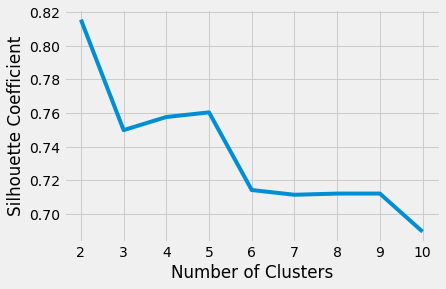

Finally Based on silhoutte score the cluster  2  is chosen having maximum score of  0.8155866612129804
Finally Running the kmeans with the clusters found out using silhoutte scores
Shape of Centroids is:  (2, 9)


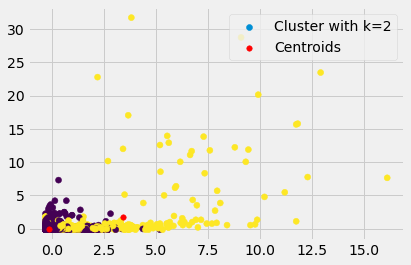

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning: The following kwargs were not used by contour: 'c'


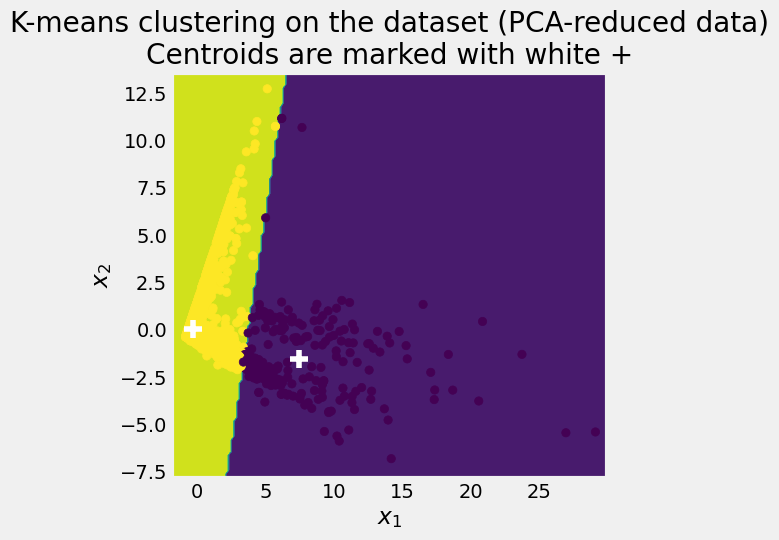



Diagonal matrix used


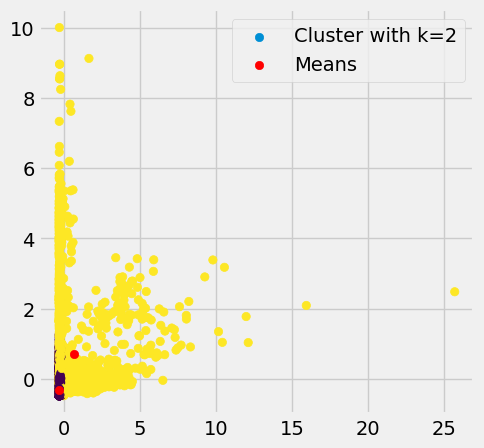

[[-0.04922719 -0.13529032 -0.14303399 -0.0359242  -0.13674309 -0.07316617
  -0.09101086 -0.0632679  -0.08490965]
 [ 1.23140625  3.38425503  3.57796105  0.8986353   3.42059562  1.83023424
   2.27661473  1.58263134  2.12399465]]
[[-0.34044173 -0.24654667 -0.29756983 -0.31874898 -0.30253761 -0.12390149
  -0.17600986 -0.152587   -0.15574803]
 [ 0.76821779  0.55634054  0.67147595  0.71926739  0.68268592  0.27958772
   0.39717194  0.3443175   0.35145046]]


Full matrix used


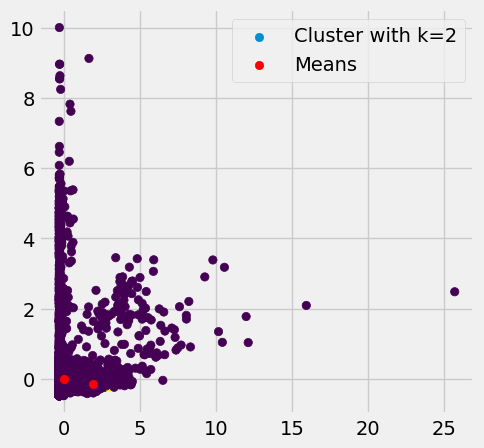

[[-0.04922719 -0.13529032 -0.14303399 -0.0359242  -0.13674309 -0.07316617
  -0.09101086 -0.0632679  -0.08490965]
 [ 1.23140625  3.38425503  3.57796105  0.8986353   3.42059562  1.83023424
   2.27661473  1.58263134  2.12399465]]
[[-1.71041885e-05 -5.48077164e-04 -5.39063536e-04  3.82258119e-05
  -5.27290835e-04 -2.34676468e-04 -3.80342685e-04 -1.34384323e-04
  -3.46260325e-04]
 [ 6.02751601e-02  1.93142393e+00  1.89965990e+00 -1.34707761e-01
   1.85817290e+00  8.26999872e-01  1.34032762e+00  4.73570353e-01
   1.22022138e+00]]


Identity matrix used


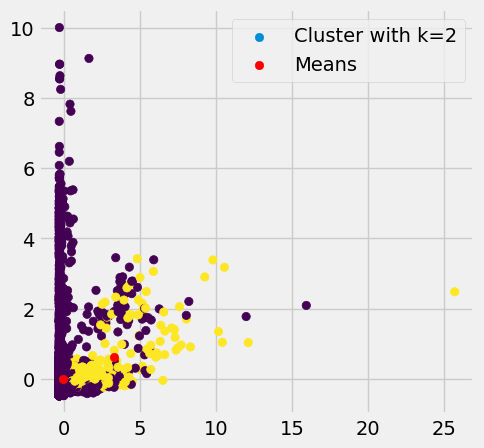

[[-0.04922719 -0.13529032 -0.14303399 -0.0359242  -0.13674309 -0.07316617
  -0.09101086 -0.0632679  -0.08490965]
 [ 1.23140625  3.38425503  3.57796105  0.8986353   3.42059562  1.83023424
   2.27661473  1.58263134  2.12399465]]
[[-0.02248598 -0.11245738 -0.0825822  -0.01568609 -0.0612317  -0.05542782
  -0.07044538 -0.06724161 -0.04830471]
 [ 0.89541244  4.47815546  3.28849841  0.62463432  2.43830201  2.20718645
   2.80519944  2.67762237  1.9235377 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:147: UserWarning: The following kwargs were not used by contour: 'c'


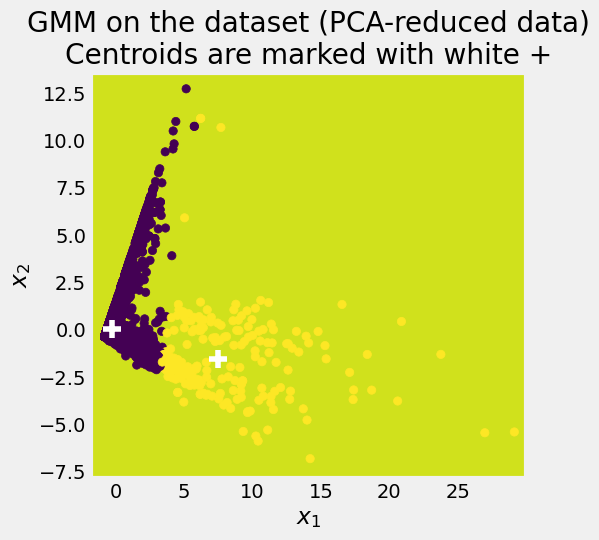

In [28]:
cluster,sil = kmeans_clustering_find_clusters(scaled_features)
final_kmeans(scaled_features,4,5,cluster)
kmeans_pca(scaled_features,cluster)
gausianmixturemodel(scaled_features,2,3,cluster)
gmm_pca(scaled_features,cluster)

# Third Dataset

In [29]:
df = pd.read_csv("CC GENERAL.csv")
df = df.fillna(0)
X = df.iloc[:,1:]
print(df.info(),'\n')
print(df.describe,'\n')
print(df.head(),'\n')
print(df.shape,'\n')
print(df.isnull().sum(),'\n')
print(df.columns,'\n')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
print(scaled_features[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## -> Running Kmeans and GMM with PCA

For Cluster  2
Centroids are:  [[ 0.06359295 -0.20278673 -0.33928363 -0.23475998 -0.37073697  0.18245728
  -0.73055022 -0.37769925 -0.65268119  0.27071251  0.19039083 -0.45522095
  -0.11783582 -0.11093342 -0.00774008 -0.28440113 -0.08476105]
 [-0.09019167  0.28760539  0.48119421  0.33295195  0.52580339 -0.25877284
   1.03611406  0.53567775  0.9256751  -0.38394217 -0.27002472  0.6456241
   0.16712246  0.15733303  0.01097748  0.40335626  0.12021366]]
Number of iterations are:  7
Labels are:  [0 0 1 0 0]
Centroid Shape is:  (2, 17)
Silhoutte Score for cluster  2  is  0.21000367712346601 

For Cluster  3
Centroids are:  [[ 0.31264583  0.43976539  1.52995055  1.28266886  1.26064072 -0.24946659
   1.14313375  1.56383181  0.95616112 -0.36196943 -0.25359193  1.68217062
   0.88882798  0.83701924  0.16444775  0.49712743  0.30310622]
 [-0.36766926 -0.17866313 -0.23300868 -0.20446395 -0.17520731 -0.30877564
  -0.0635817  -0.23518285 -0.04909638 -0.33413674 -0.29847882 -0.2438739
  -0.3360769  -0.2

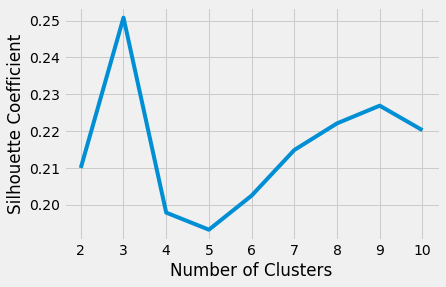

Finally Based on silhoutte score the cluster  3  is chosen having maximum score of  0.25080034755682434
Finally Running the kmeans with the clusters found out using silhoutte scores
Shape of Centroids is:  (3, 17)


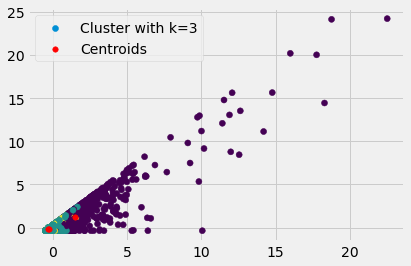

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning: The following kwargs were not used by contour: 'c'


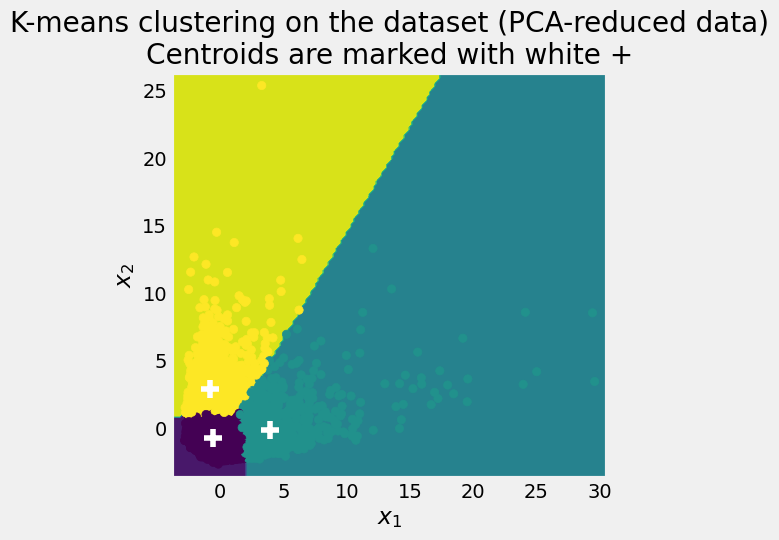



Diagonal matrix used


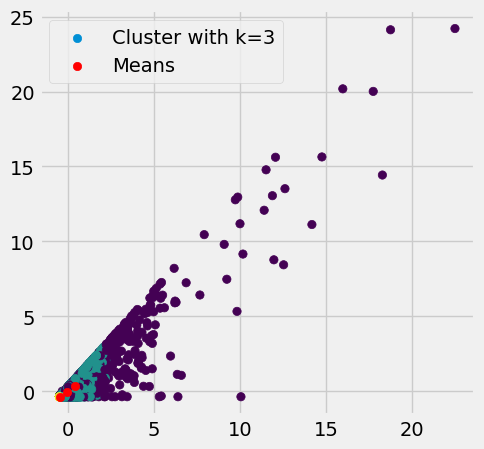

[[ 0.31264583  0.43976539  1.52995055  1.28266886  1.26064072 -0.24946659
   1.14313375  1.56383181  0.95616112 -0.36196943 -0.25359193  1.68217062
   0.88882798  0.83701924  0.16444775  0.49712743  0.30310622]
 [-0.36766926 -0.17866313 -0.23300868 -0.20446395 -0.17520731 -0.30877564
  -0.0635817  -0.23518285 -0.04909638 -0.33413674 -0.29847882 -0.2438739
  -0.3360769  -0.28454499 -0.13928469  0.00687073 -0.02881382]
 [ 1.16759147  0.34513939 -0.28830051 -0.20676979 -0.30187933  1.37589183
  -0.63892544 -0.30612746 -0.5500794   1.55994062  1.33961755 -0.36418791
   0.60166923  0.44418947  0.40679912 -0.41014841 -0.12360012]]
[[ 0.55381299  0.32051623  0.40209741  0.35515382  0.29837568  0.39507651
   0.28593755  0.34101995  0.1834608   0.57215247  0.43339086  0.40712757
   0.27731452  0.41267493  0.37374491 -0.24150691  0.00499399]
 [-0.46657186 -0.20568266 -0.02539023 -0.04960789  0.03107778 -0.46678555
   0.39948544  0.11034875  0.3189095  -0.67534886 -0.47606982  0.02901882
  -0.107

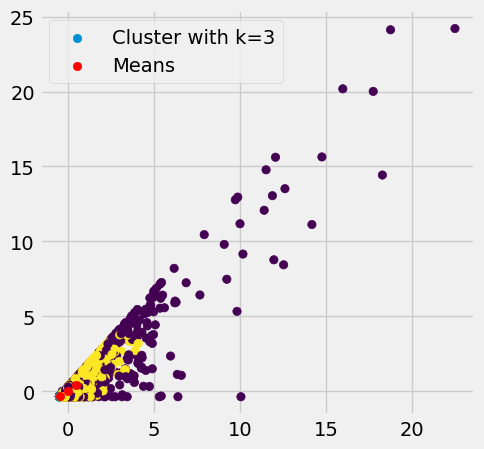

[[ 0.31264583  0.43976539  1.52995055  1.28266886  1.26064072 -0.24946659
   1.14313375  1.56383181  0.95616112 -0.36196943 -0.25359193  1.68217062
   0.88882798  0.83701924  0.16444775  0.49712743  0.30310622]
 [-0.36766926 -0.17866313 -0.23300868 -0.20446395 -0.17520731 -0.30877564
  -0.0635817  -0.23518285 -0.04909638 -0.33413674 -0.29847882 -0.2438739
  -0.3360769  -0.28454499 -0.13928469  0.00687073 -0.02881382]
 [ 1.16759147  0.34513939 -0.28830051 -0.20676979 -0.30187933  1.37589183
  -0.63892544 -0.30612746 -0.5500794   1.55994062  1.33961755 -0.36418791
   0.60166923  0.44418947  0.40679912 -0.41014841 -0.12360012]]
[[ 0.57947063  0.31512357  0.48495416  0.39397034  0.42368846  0.36441659
   0.50347001  0.35218726  0.41662286  0.49418271  0.39315687  0.53671586
   0.28257252  0.48972397  0.51570309 -0.19917931  0.02532767]
 [ 0.20618191 -0.01680019 -0.44257989 -0.32221523 -0.45457623  0.37684107
  -1.11479766 -0.53476008 -0.91699519  0.57084084  0.36767709 -0.56701361
  -0.140

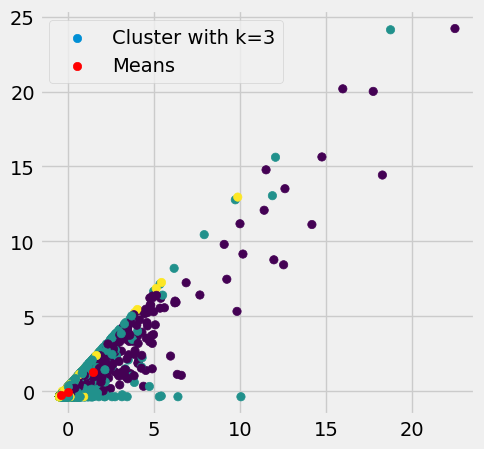

[[ 0.31264583  0.43976539  1.52995055  1.28266886  1.26064072 -0.24946659
   1.14313375  1.56383181  0.95616112 -0.36196943 -0.25359193  1.68217062
   0.88882798  0.83701924  0.16444775  0.49712743  0.30310622]
 [-0.36766926 -0.17866313 -0.23300868 -0.20446395 -0.17520731 -0.30877564
  -0.0635817  -0.23518285 -0.04909638 -0.33413674 -0.29847882 -0.2438739
  -0.3360769  -0.28454499 -0.13928469  0.00687073 -0.02881382]
 [ 1.16759147  0.34513939 -0.28830051 -0.20676979 -0.30187933  1.37589183
  -0.63892544 -0.30612746 -0.5500794   1.55994062  1.33961755 -0.36418791
   0.60166923  0.44418947  0.40679912 -0.41014841 -0.12360012]]
[[ 0.32442909  0.45741545  1.48390155  1.28083947  1.15466271 -0.1682887
   1.19033221  1.95937266  1.21975864 -0.21863164 -0.11403449  1.85488271
   0.80799317  0.7915847   0.00242574  0.41331953  0.22090864]
 [-0.27197006 -0.32712375  0.0082456  -0.04631333  0.10466151 -0.2145959
   0.51375676 -0.00371121  0.39669072 -0.3172887  -0.22100623  0.05150839
  -0.07401

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:147: UserWarning: The following kwargs were not used by contour: 'c'


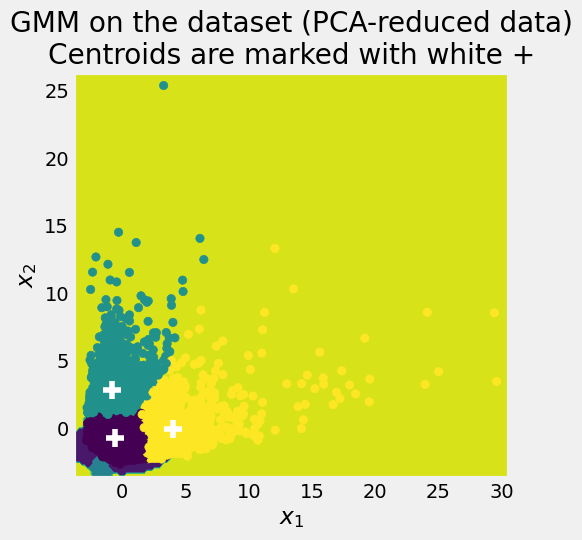

In [31]:
cluster,sil = kmeans_clustering_find_clusters(scaled_features)
final_kmeans(scaled_features,2,3,cluster)
kmeans_pca(scaled_features,cluster)
gausianmixturemodel(scaled_features,2,3,cluster)
gmm_pca(scaled_features,cluster)